# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Play Store App Review Analysis project aims to leverage Exploratory Data Analysis (EDA) to uncover insights from a dataset comprising app names, categories, ratings, reviews, sizes, installs, types, prices, content ratings, genres, last updated dates, current versions, and Android version requirements. Using Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn, we will clean the data, handle missing values, and perform various analyses to understand app performance, user feedback, and market trends. The goal is to identify key factors influencing app ratings, popular app categories, and common user concerns, providing actionable insights for app developers to enhance their apps and user satisfaction.

# **GitHub Link -**

https://github.com/Akshaydarade163/Project/blob/main/Play_Store_Data_Analysis.ipynb

# **Problem Statement**


The Google Play Store hosts millions of apps across various categories, and user reviews play a crucial role in determining an app's success and visibility. However, the vast amount of review data available makes it challenging for developers to extract meaningful insights manually. This project seeks to address the following questions:

What are the key factors that influence app ratings and user reviews on the Play Store?
How do app characteristics such as category, size, type (free or paid), and content rating impact their performance and popularity?
What common themes and issues can be identified from user reviews that can help developers improve their apps?
How do trends over time, such as the frequency of updates, affect user satisfaction and app ratings?
By analyzing a comprehensive dataset of Play Store app reviews and related attributes, we aim to provide actionable insights and recommendations for app developers to enhance their apps, improve user satisfaction, and increase their market competitiveness

#### **Define Your Business Objective?**

The primary business objective of the Play Store App Review Analysis project is to empower app developers and stakeholders with data-driven insights to improve app quality, enhance user satisfaction, and optimize app store performance. Specifically, the project aims to:

Improve App Ratings: Identify the key factors influencing app ratings and user feedback to help developers understand what drives positive and negative reviews.
Enhance User Experience: Analyze common themes and issues in user reviews to provide actionable recommendations for improving app features and usability.
Optimize App Performance: Examine the impact of app characteristics such as category, size, type, and content rating on their performance to guide strategic decisions on app development and marketing.
Increase Market Competitiveness: Utilize trend analysis to understand the effects of updates and other temporal factors on app ratings and installs, helping developers stay competitive in a dynamic market.
Support Data-Driven Decision Making: Provide comprehensive, visual, and easily interpretable insights that enable developers to make informed decisions based on user feedback and market trends.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
data=pd.read_csv('/content/Play Store Data.csv')

### Dataset First View

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [4]:
data.shape

(10841, 13)

### Dataset Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [6]:
data.duplicated().sum()

483

#### Missing Values/Null Values

In [7]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


<Axes: >

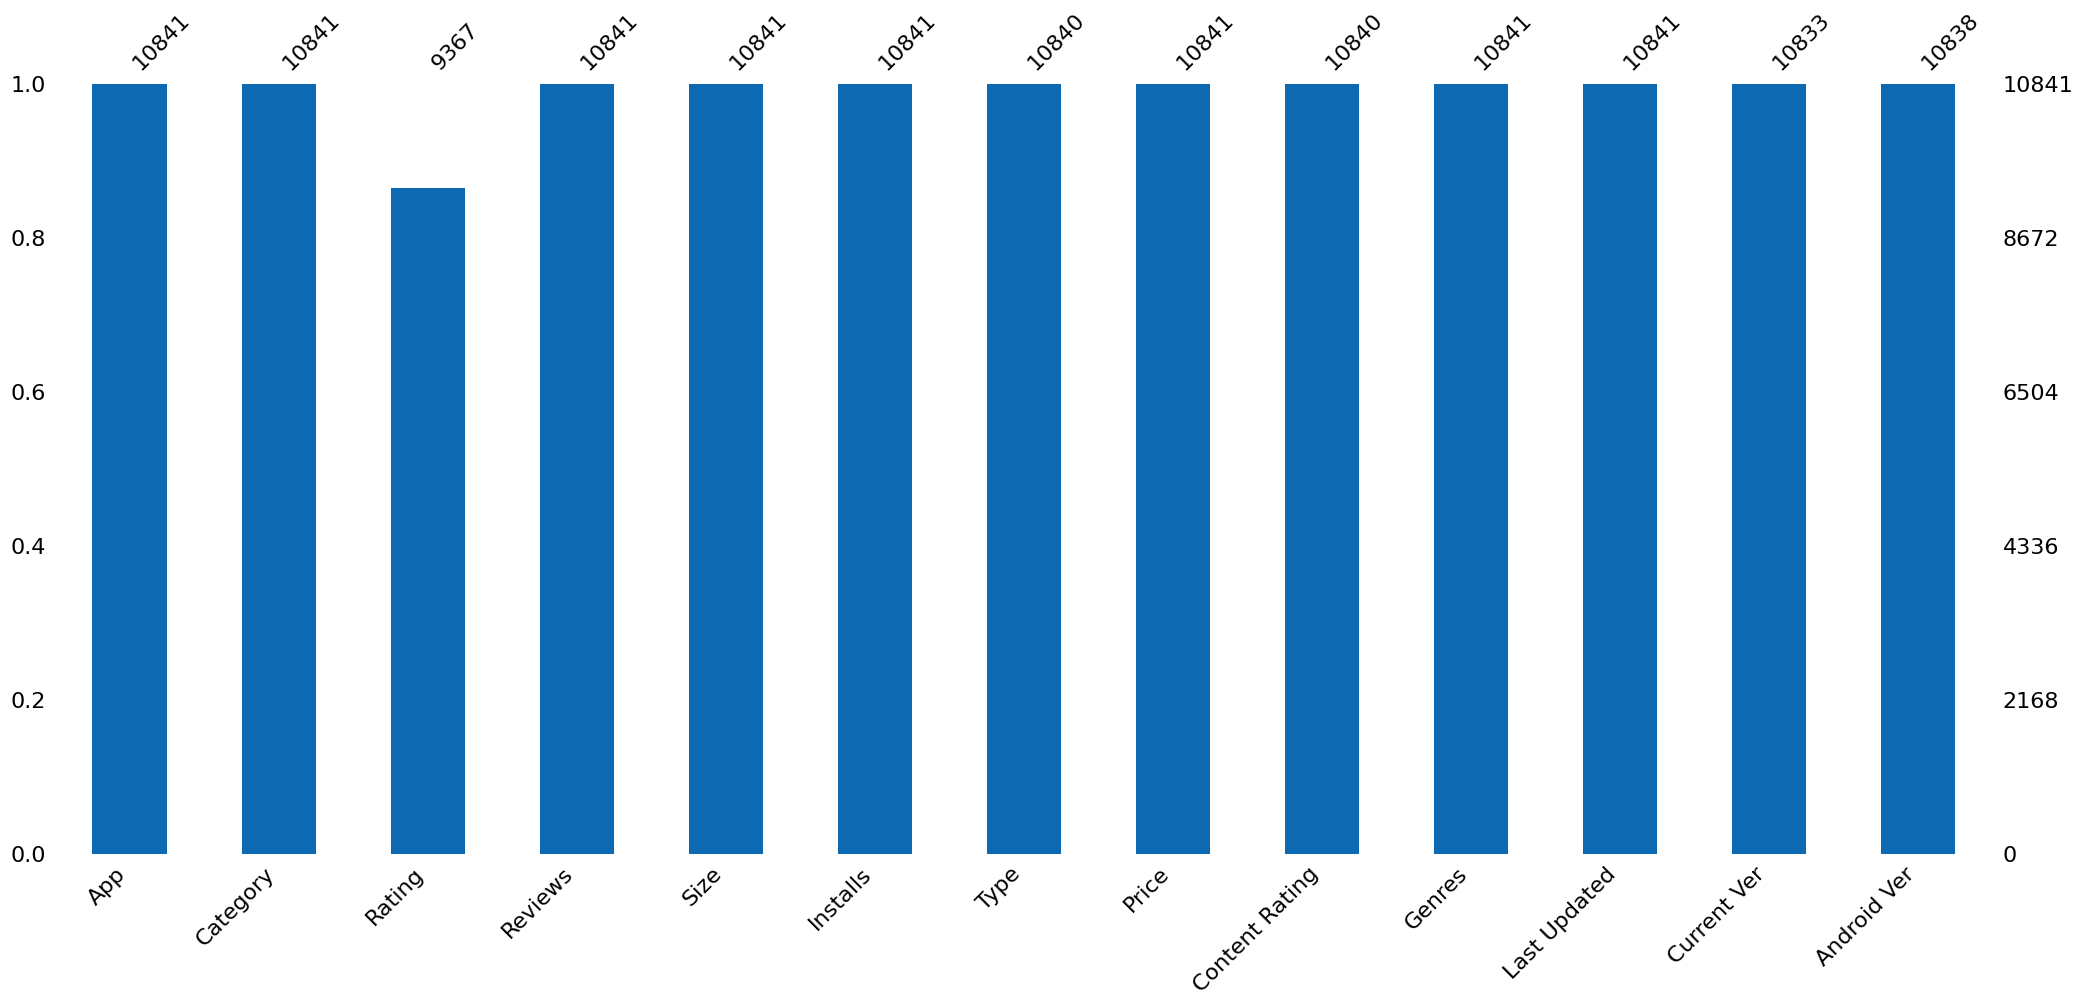

In [8]:
import missingno
missingno.bar(data,color='#0e69b3')

### What did you know about your dataset?

The Play Store app review dataset consists of 10,841 entries and 13 columns, providing a comprehensive view of various app attributes. The columns include app name, category, rating, reviews, size, installs, type (free or paid), price, content rating, genres, last updated date, current version, and required Android version. Most columns are of type Object, except for Rating, which is Float64. The dataset has some missing values in the Rating, Type, Content Rating, Current Ver, and Android Ver columns, which will require appropriate handling. Data types for columns like Reviews, Size, Installs, Price, and dates need conversion for accurate analysis. The dataset uses approximately 1.1 MB of memory.

## ***2. Understanding Your Variables***

In [9]:
#dataset columns
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### Variables Description

The Play Store app review dataset comprises 10,841 entries with 13 columns, each representing various attributes of apps. These attributes include app names, categories, user reviews, sizes, installs, types (free or paid), prices, content ratings, genres, last updated dates, current versions, and required Android versions. The dataset reveals a diverse range of apps, with the most frequent app being "ROBLOX" and the most common category being "FAMILY." Reviews, sizes, installs, prices, and dates are currently stored as objects, requiring conversion for analysis. Notably, the "Varies with device" label appears frequently in size and current version fields. The dataset highlights that the majority of apps are free and have a content rating suitable for everyone.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [15]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [16]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [17]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [18]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [19]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [20]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
df=data.copy()

In [22]:
df['Reviews'].str.isnumeric().sum()

10840

In [23]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
df=df.drop(df.index[10472])

In [25]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
df['Reviews']=df['Reviews'].astype(int)

In [27]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].astype(float)

In [28]:
chars=['+',',','$']
cols=['Installs','Price']
for item in chars:
    for col in cols:
        df[col]=df[col].str.replace(item,'')

In [29]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')

In [30]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [32]:
df[df.duplicated('App')].shape

(1181, 16)

###Dataset having some duplicated record

In [33]:
#droping duplicated record only keeping first record
df=df.drop_duplicates(subset=['App'],keep='first')

In [34]:
df.shape

(9659, 16)

In [35]:
df.duplicated().sum()

0

In [36]:
df['Category'].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [37]:
df['Type'].value_counts()

,count
Type,
Free,8902
Paid,756


In [38]:
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,7903
Teen,1036
Mature 17+,393
Everyone 10+,322
Adults only 18+,3
Unrated,2


In [39]:
df['Genres'].value_counts()

,count
Genres,
Tools,826
Entertainment,561
Education,510
Business,420
Medical,395
...,...
Art & Design;Pretend Play,1
Lifestyle;Pretend Play,1
Comics;Creativity,1


In [40]:
df[df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,19,6,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,31,12,2017
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,5,3,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,27,6,2018


In [41]:
#Highest rated  apps in Comics Genres
df[(df['Genres']=='Comics') & (df['Rating']==5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12000.0,5000,Free,0.0,Everyone,Comics,2018-07-31,1.0.5,5.0 and up,31,7,2018


In [42]:
#Highest rated  apps in Education Genres
df[(df['Genres']=='Education') & (df['Rating']==5)] [0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63000.0,10,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3 and up,4,4,2018
5450,AP® Guide,FAMILY,5.0,3,2.1,1000,Free,0.00,Everyone,Education,2017-07-31,1.3,4.0.3 and up,31,7,2017
5482,meStudying: AP English Lit,FAMILY,5.0,1,655.0,10,Paid,4.99,Everyone,Education,2013-08-31,1.3,2.0.1 and up,31,8,2013
5489,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10,Paid,29.99,Mature 17+,Education,2016-01-19,3.30,4.0 and up,19,1,2016
5506,AQ Ria Retail,FAMILY,5.0,4,52000.0,50,Free,0.00,Everyone,Education,2018-04-03,1.1,4.1 and up,3,4,2018


In [43]:
#top 5 Highest rated  games
df[(df['Category']=='GAME') & (df['Rating']==5)] [0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
5795,Axe Champs! Wars,GAME,5.0,8,25000.0,50,Free,0.00,Everyone,Arcade,2018-06-26,1.1,4.1 and up,26,6,2018
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15000.0,100,Free,0.00,Everyone,Arcade,2017-09-27,1.1,4.2 and up,27,9,2017
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up,8,2,2017
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up,23,7,2018
7402,Trovami se ci riesci,GAME,5.0,11,6.1,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up,11,3,2017


In [44]:
df['Installs'].nlargest()

,Installs
152,1000000000
335,1000000000
336,1000000000
338,1000000000
340,1000000000


In [45]:
#Most downloaded apps in playstore
df[df['Installs']==1000000000] [0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,8,2018
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018


In [46]:
df['Installs'].nsmallest()

,Installs
4465,0
5307,0
5486,0
5945,0
6692,0


In [47]:
#Zero downloaded apps in playstore
df[df['Installs']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up,11,7,2018
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,28,7,2017
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,30,7,2017
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33000.0,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up,15,4,2016
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,24,11,2017
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,21,7,2018
8081,CX Network,BUSINESS,NaN,0,10000.0,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,6,8,2018
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up,7,7,2018
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,14,3,2017
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,28,6,2018


In [48]:
df.groupby('Type')['Rating'].mean()

,Rating
Type,
Free,4.166372
Paid,4.259603


In [49]:
df.groupby('Content Rating')['Rating'].mean()

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone,4.166319
Everyone 10+,4.225902
Mature 17+,4.121849
Teen,4.225658
Unrated,4.100000


In [50]:
df.groupby('Genres')['Rating'].mean()

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.044898
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


In [51]:
df.groupby('Category')['Rating'].mean()

,Rating
Category,
ART_AND_DESIGN,4.357377
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.344970
BUSINESS,4.098479
COMICS,4.181481
COMMUNICATION,4.121484
DATING,3.970149
EDUCATION,4.364407


In [52]:
pd.crosstab(df['Type'],df['Content Rating'])

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,7248,290,375,984,2
Paid,0,655,31,18,52,0


In [53]:
df.groupby(df['Type'])['Installs'].mean()

,Installs
Type,
Free,8.432439e+06
Paid,7.587947e+04


In [54]:
df['Rating'].mean()

4.173243045387994

In [55]:
df['Rating'].median()

4.3

In [56]:
df['Rating'].skew()

-1.7439651379389551

#####Rating is negatively skewed data. i.e Left skewed.

In [57]:
df['Rating'].kurt()

5.120821454143948

#####A kurtosis value of 5.12 for the 'Rating' column in  DataFrame indicates that the distribution of ratings is leptokurtic. This means the distribution has a sharper peak and heavier tails compared to a normal distribution.

In [58]:
df['Rating'].var()

0.28796610126340294

#####A variance value of 0.288 for the 'Rating' column in  DataFrame indicates that the ratings are relatively close to the mean, suggesting low to moderate variability in the ratings.

In [59]:
df['Rating'].std()

0.5366247303874496

#####The standard deviation of 0.537 for the 'Rating' column in  DataFrame indicates that the ratings deviate, on average, about 0.537 units from the mean rating. This relatively small standard deviation suggests that the ratings are fairly tightly clustered around the mean, implying low to moderate variability.

In [60]:
df['Installs'].mean()

7777506.732270421

In [61]:
df['Installs'].median()

100000.0

In [62]:
df['Installs'].max()

1000000000

In [63]:
df['Installs'].min()

0

In [64]:
df['Installs'].mode()

,Installs
0,1000000


In [65]:
df['Installs'].var()

2889952527015269.5

In [66]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000,9659,9659.000000,9659.000000,9659.000000
mean,4.173243,2.165926e+05,18372.195837,7.777507e+06,1.099299,2017-10-30 19:34:02.074748928,15.632985,6.364013,2017.345688
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.000000,1.000000,2010.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000,2017-08-05 12:00:00,7.000000,5.000000,2017.000000
50%,4.300000,9.670000e+02,12000.000000,1.000000e+05,0.000000,2018-05-04 00:00:00,16.000000,7.000000,2018.000000
75%,4.500000,2.940100e+04,28000.000000,1.000000e+06,0.000000,2018-07-17 00:00:00,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,31.000000,12.000000,2018.000000
std,0.536625,1.831320e+06,23292.236057,5.375828e+07,16.852152,NaN,9.431017,2.659610,1.137600


### What all manipulations have you done and insights you found?

#####I have applied various statistical measure to understand given dataset. I have found top categories in each generes.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Rating', ylabel='Density'>

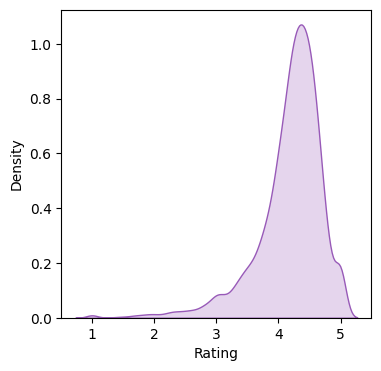

In [67]:
# Chart - 1 visualization code
plt.figure(figsize=(4,4))
sns.kdeplot(df['Rating'],fill=True,color='#985ab8')

##### 1. Why did you pick the specific chart?

To understand data distribution of Rating

##### 2. What is/are the insight(s) found from the chart?

Rating column data is left skewed data. More data lies on the right side.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the application rating is in range of 4-5 that is good for business purpose.

#### Chart - 2

<Axes: xlabel='Size', ylabel='Density'>

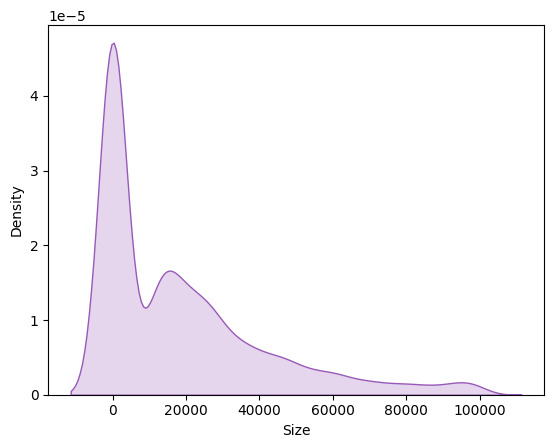

In [68]:
# Chart - 2 visualization code
sns.kdeplot(df['Size'],fill=True,color='#985ab8')

##### 1. Why did you pick the specific chart?

To understand distrubution of Size of App on playstore

##### 2. What is/are the insight(s) found from the chart?

Most of the application size is in range of 20000 - 40000 kb

####Chart 3

<Axes: xlabel='Price', ylabel='Density'>

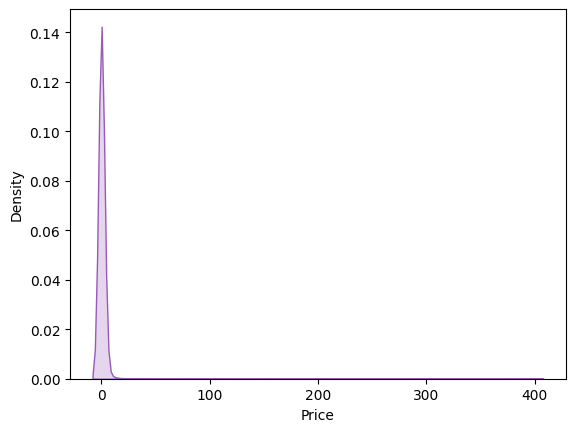

In [69]:
# Chart - 3 visualization code
sns.kdeplot(data=df,x='Price',fill=True,color='#985ab8')

######Most of the app price is 0 rupess i.e unpaid

#### Chart - 4

<Axes: xlabel='Month', ylabel='Density'>

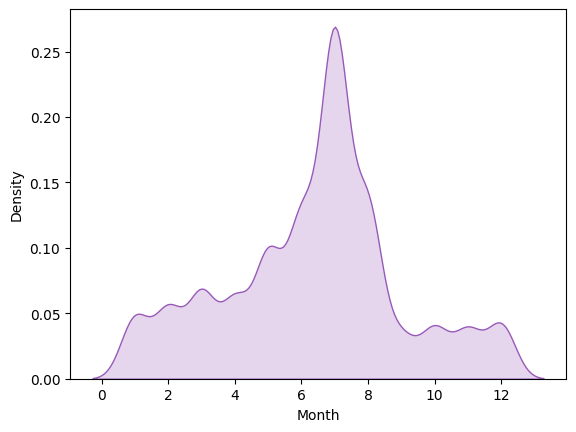

In [70]:
# Chart - 4 visualization code
sns.kdeplot(df['Month'],fill=True,color='#985ab8')

######Mostly app is updated in 4 to 8 months

#### Chart - 5

<Axes: xlabel='Year', ylabel='Density'>

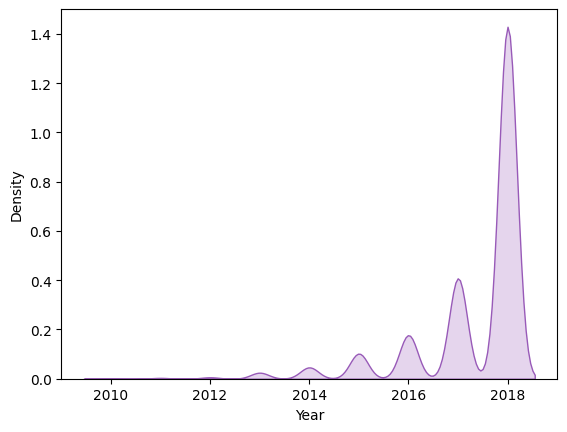

In [71]:
# Chart - 5 visualization code
sns.kdeplot(df['Year'],fill=True,color='#985ab8')

###Most of the application are updated in year 2018

#### Chart - 6

<Axes: xlabel='Category'>

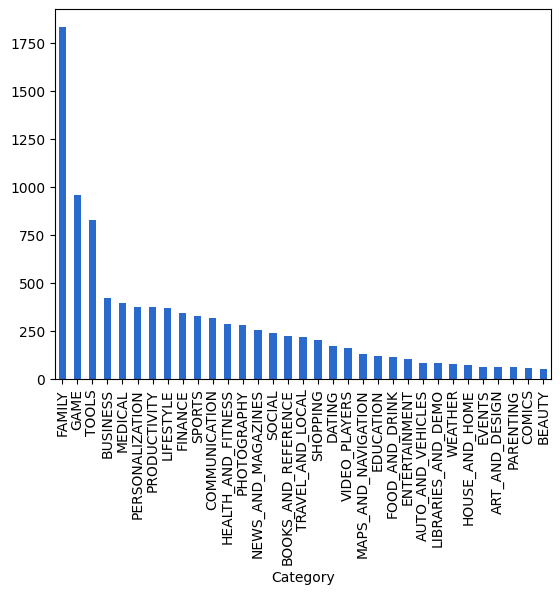

In [72]:
# Chart - 6 visualization code
df['Category'].value_counts().plot(kind='bar', color='#296acc')

##### 1. Why did you pick the specific chart?

A bar chart is chosen for visualizing the value counts of the Category column because it effectively represents the frequency distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

The bar chart of the Play Store app categories reveals that the FAMILY category dominates with 1,832 entries, followed by GAME with 959 and TOOLS with 827, highlighting a significant focus on family-oriented, gaming, and utility apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high number of apps in categories like FAMILY, GAME, and TOOLS suggests significant market saturation. New entrants in these categories may face intense competition, making it harder to gain visibility and attract users.

#### Chart - 7

<ipython-input-73-e9ad9a5fa19b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Type',palette="Set2")


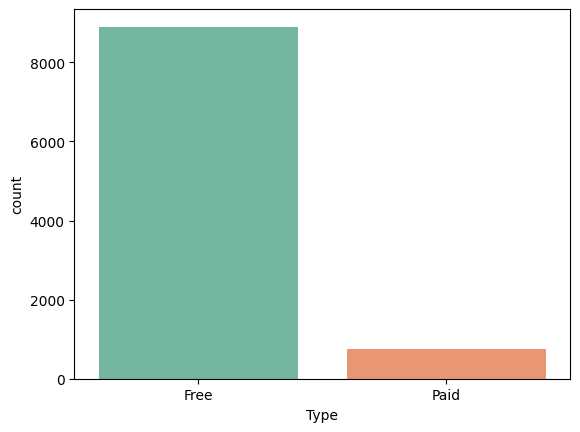

In [73]:
# Chart - 7 visualization code
sns.countplot(data=df,x='Type',palette="Set2")
plt.show()

##### 1. Why did you pick the specific chart?

The countplot chosen for visualizing the distribution of app types (free vs. paid) in the dataset because it effectively illustrates the count of each category within a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Most of the application are free.

#### Chart - 8

<Axes: xlabel='Content Rating'>

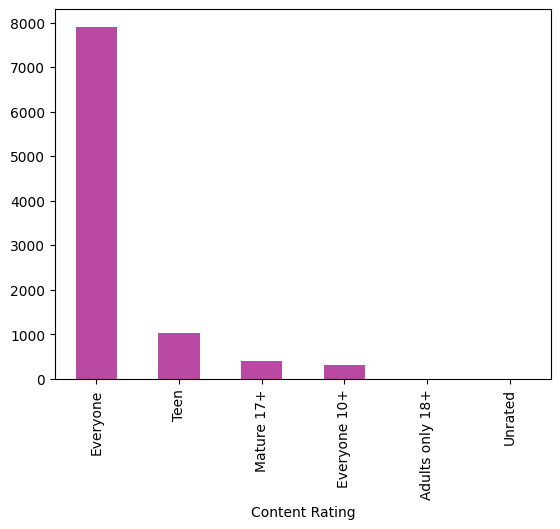

In [74]:
# Chart - 8 visualization code
df['Content Rating'].value_counts().plot(kind='bar',color='#ba49a3')

####The Content Rating distribution chart demonstrates that the majority of Play Store apps are designed for a general audience (Everyone), with a significant number targeting teens and a smaller portion for mature audiences.

#### Chart - 9

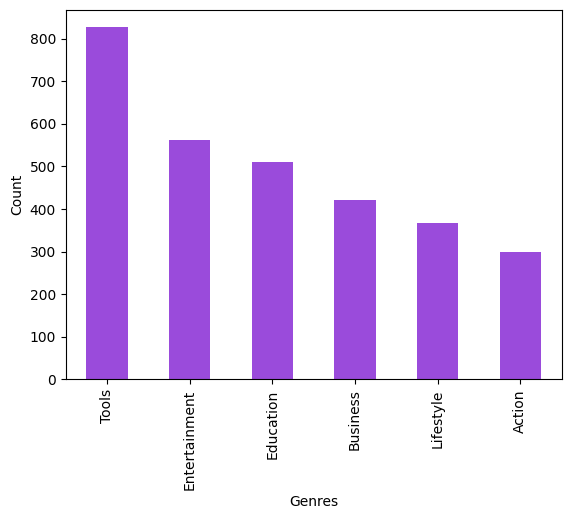

In [75]:
# Chart - 9 visualization code
selected_genres = ['Tools','Entertainment','Education','Business','Lifestyle', 'Action']

# Filter the DataFrame to include only the selected genres
filtered_df = df[df['Genres'].isin(selected_genres)]

# Plotting the bar chart for the selected genres
filtered_df['Genres'].value_counts().plot(kind='bar', color='#9a4bdb')

plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

#####The distribution of genres illustrates a broad spectrum of user interests on the Play Store. Tools, Entertainment, and Education dominate the landscape, indicating high demand in utility, leisure, and learning.

#### Chart - 10

<ipython-input-76-56cba5ffe5bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df2,x ='Installs',y = 'Category',palette='tab10')


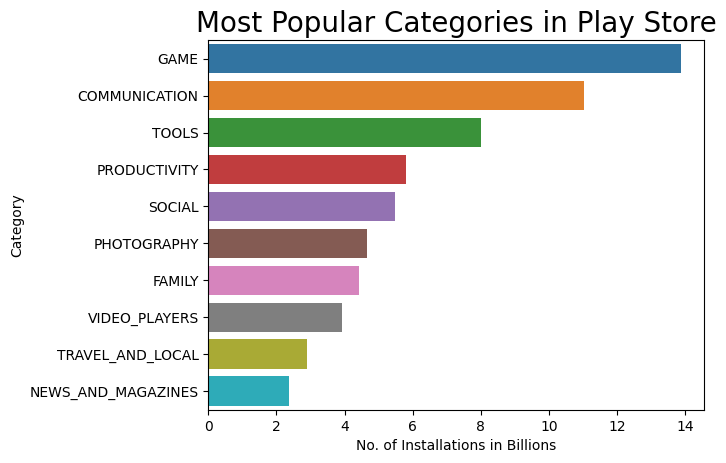

In [76]:
# Chart - 10 visualization code
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000 #converting into billions
df2 = df_cat_installs.head(10)
# plt.figure(figsize = (8,9))
ax = sns.barplot(data = df2,x ='Installs',y = 'Category',palette='tab10')
ax.set_xlabel('No. of Installations in Billions')
ax.set_title("Most Popular Categories in Play Store", size = 20)
plt.show()

####Game is most popular categroy download by a people.

#### Chart - 11

<Axes: xlabel='Rating', ylabel='Reviews'>

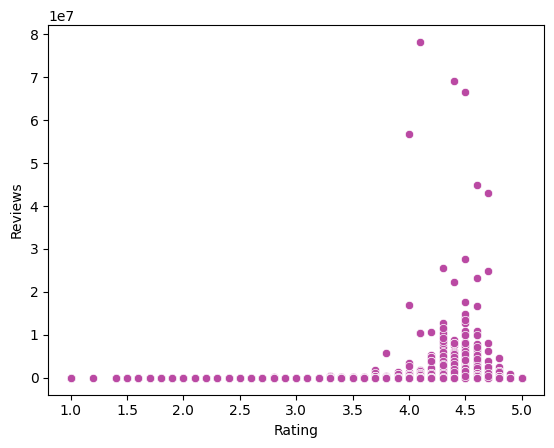

In [77]:
# Chart - 11 visualization code
sns.scatterplot(data=df, x='Rating', y='Reviews', color='#ba49a3')

#####If Rating increases Reviews also increases

#### Chart - 12

<Axes: xlabel='Price'>

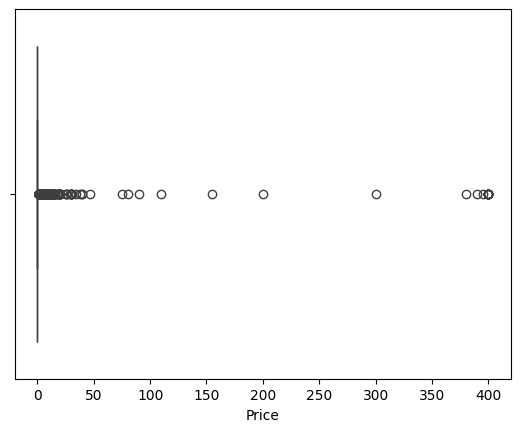

In [78]:
# Chart - 12 visualization code
sns.boxplot(data=df,x='Price')

#####Boxplot is used to find outlier. 400 is the largest price. Here outlier at right side.

#### Chart - 13

<Axes: xlabel='Rating'>

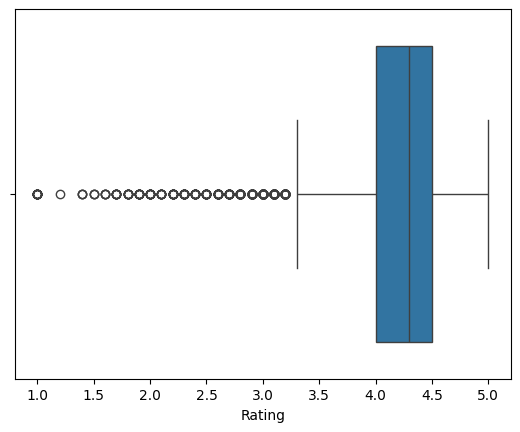

In [79]:
# Chart - 12 visualization code
sns.boxplot(data=df,x='Rating')

####Boxplot is used to find outlier. Highest rating is 5 and lowest rating is 1. Here outlier at left side. Here 4.3 is a median values.

#### Chart - 14

<Axes: xlabel='Year'>

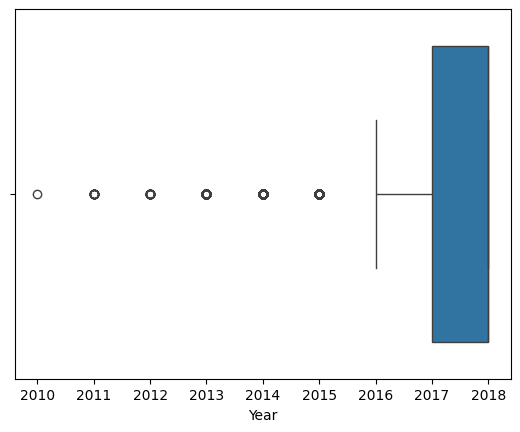

In [80]:
# Chart - 13 visualization code
sns.boxplot(data=df,x='Year')

#####Here outlier is at left side. 2018 is greatest year and 2010 is smallest year in dataset.

#### Chart - 15 - Correlation Heatmap

<Axes: >

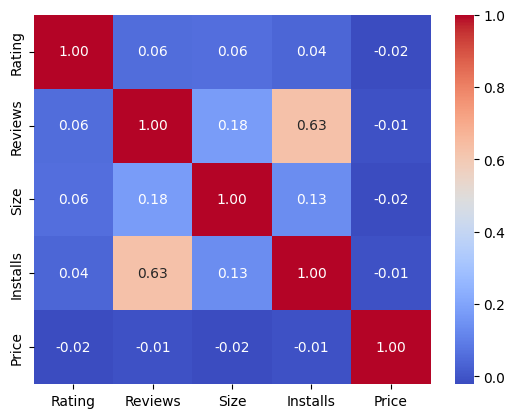

In [81]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

##### 1. Why did you pick the specific chart?

A heat map is a 2-dimensional data visualization technique that represents the magnitude of individual values within a dataset as a color.

##### 2. What is/are the insight(s) found from the chart?

Reviews and Installs are 63% dependent on each other. i.e There is positive correlation between Revies and Installs.

#### Chart - 16 - Pair Plot

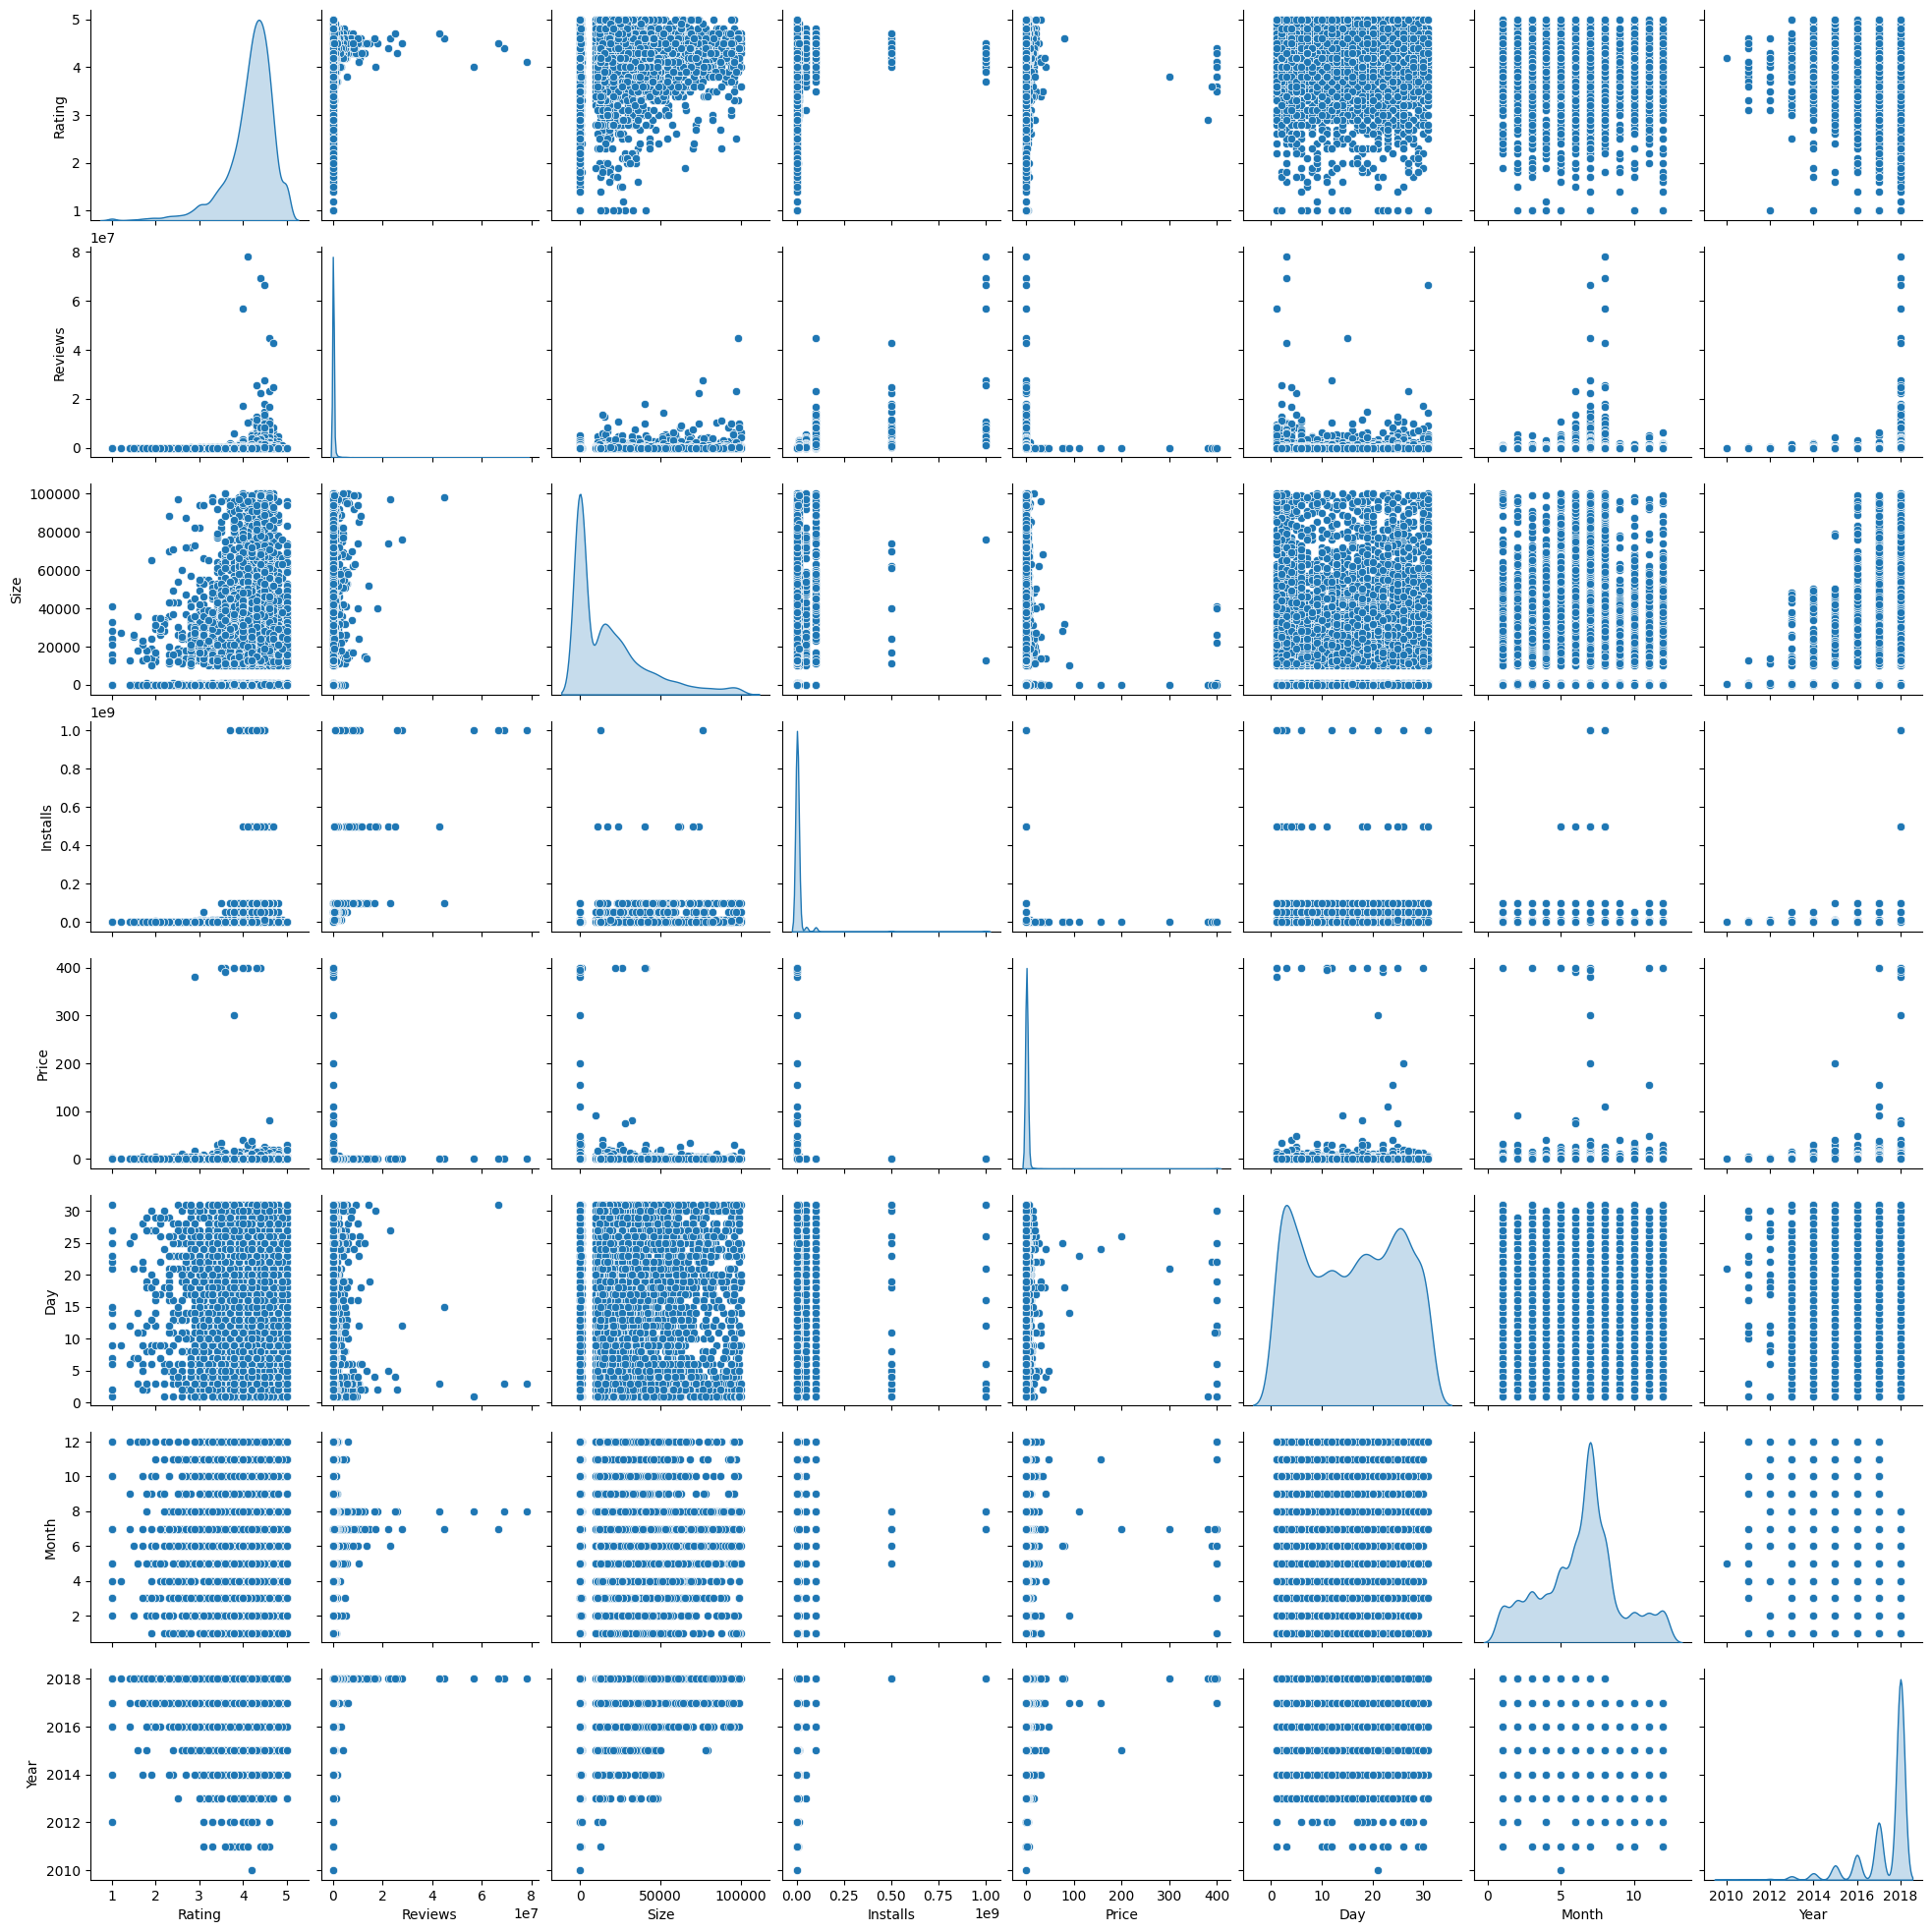

In [82]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde', markers='o', hue=None)

Pairplot gives scatterplot and density plot between two variable.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Improving App Ratings: Enhancing user satisfaction and app quality to achieve higher ratings.
Identifying Key Factors Affecting Ratings: Understanding what influences app ratings the most.
Increasing App Downloads and User Engagement: Boosting the number of downloads and user engagement by analyzing app features, reviews, and ratings.

1. Improving App Ratings
Solution:

Address Outliers: Since the distribution has high kurtosis, indicating more extreme ratings, it's crucial to analyze and address the causes of low ratings (outliers). Common reasons for low ratings often include bugs, crashes, poor user interface, or unmet expectations.
Enhance Quality Control: Implement rigorous quality assurance and user testing processes to identify and fix issues before they affect users.
Customer Feedback Loop: Actively seek and respond to user feedback. Implement a feedback mechanism within the app to quickly identify and resolve issues that users face.
2. Identifying Key Factors Affecting Ratings
Solution:

Analyze Reviews: Perform sentiment analysis on user reviews to identify common themes and issues that impact ratings. Look for frequent mentions of specific problems or praise that correlate with high or low ratings.
Feature Analysis: Examine the correlation between app features and ratings. Identify which features users rate highly and which features are commonly associated with lower ratings.
Update Frequency: Determine the impact of update frequency on ratings. Regular updates that introduce new features or improvements can positively influence ratings.
3. Increasing App Downloads and User Engagement
Solution:

Optimize App Store Listing: Ensure that the app description, screenshots, and promotional videos effectively highlight the app’s features and benefits. Positive ratings and reviews should be prominently displayed.
Marketing Strategies: Use targeted marketing strategies to reach potential users who are likely to rate the app highly. Consider using social media, influencer partnerships, and app store advertisements.
User Retention Strategies: Implement strategies to keep users engaged, such as loyalty programs, regular updates, and engaging content. Higher engagement often leads to better ratings as users feel more connected to the app.

# **Conclusion**

The Play Store data analysis project aimed to enhance app performance by understanding and leveraging app ratings. The statistical analysis revealed a high kurtosis of 5.12, indicating a leptokurtic distribution with more extreme values, a variance of 0.288, suggesting low to moderate variability, and a standard deviation of 0.537, confirming tight clustering around the mean. To improve app ratings, it is crucial to address outliers by enhancing quality control and establishing a robust user feedback loop. Identifying key factors affecting ratings involves sentiment analysis of user reviews and assessing the impact of specific features and update frequency. Increasing downloads and engagement can be achieved by optimizing the app store listing, targeted marketing, and user retention strategies. Monitoring competitors, making data-driven decisions, and educating users are essential for continuous improvement. This data-driven approach is vital for improving user satisfaction, increasing ratings, and driving more downloads and engagement in the competitive app marketplace.






